In [3]:
#cargar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor
%matplotlib inline

In [4]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [5]:
from joblib import dump, load

#RL_model = load('model_RL_27-06-2021.joblib') ---> MEJOR MODELO ENTRENADO HASTA AHORA
RL_model = load('model_RL_07-09-2021.joblib') # Se carga el último modelo entrenado

In [6]:
#Se cargan datos de simulacion con los valores exactos en Comsol with Matlab. Mi_H2O = 45.08
dataSimulacionValExact50 = np.loadtxt('Datasets\BBDD_data_wt_Nanofluid_50.txt',delimiter=',')
#Se cargan datos de simulacion con los valores exactos en Comsol with Matlab. Mi_H2O = 13.72
dataSimulacionValExact25 = np.loadtxt('Datasets\BBDD_data_wt_Nanofluid_25.txt',delimiter=',')
#Se cargan datos de simulacion con los valores exactos en Comsol with Matlab. Mi_H2O = 1.96
dataSimulacionValExactDW = np.loadtxt('Datasets\BBDD_data_wt_Nanofluid_DW.txt',delimiter=',')


# Variables de entrada:
XExact50 = dataSimulacionValExact50[:4]
XExact25 = dataSimulacionValExact25[:4]
XExactDW = dataSimulacionValExactDW[:4]

# Temperatura de salida:
YExact50 = dataSimulacionValExact50[4:101]
YExact25 = dataSimulacionValExact25[4:101]
YExactDW = dataSimulacionValExactDW[4:101]

In [7]:
Y_Exact_values_Comsol = np.vstack((YExact50,YExact25,YExactDW))

In [8]:
# Temperatura incial(COMSOL)= 297.95
DTPE_Exact_Comsol = Y_Exact_values_Comsol - 297.95
DTPE_Exact_Comsol

array([[1.0000e-04, 6.9500e-02, 1.3510e-01, 1.9760e-01, 2.5760e-01,
        3.1510e-01, 3.7010e-01, 4.2370e-01, 4.7550e-01, 5.2560e-01,
        5.7370e-01, 6.2000e-01, 6.6440e-01, 7.0850e-01, 7.5180e-01,
        7.9390e-01, 8.3480e-01, 8.7440e-01, 9.1280e-01, 9.4990e-01,
        9.8580e-01, 1.0204e+00, 1.0540e+00, 1.0886e+00, 1.1224e+00,
        1.1553e+00, 1.1875e+00, 1.2189e+00, 1.2495e+00, 1.2793e+00,
        1.3083e+00, 1.3365e+00, 1.3646e+00, 1.3929e+00, 1.4208e+00,
        1.4481e+00, 1.4749e+00, 1.5012e+00, 1.5270e+00, 1.5523e+00,
        1.5771e+00, 1.6014e+00, 1.6259e+00, 1.6500e+00, 1.6738e+00,
        1.6972e+00, 1.7203e+00, 1.7429e+00, 1.7652e+00, 1.7872e+00,
        1.8088e+00, 1.8301e+00, 1.8513e+00, 1.8723e+00, 1.8929e+00,
        1.9132e+00, 1.9333e+00, 1.9530e+00, 1.9725e+00, 1.9916e+00,
        2.0105e+00, 2.0293e+00, 2.0479e+00, 2.0662e+00, 2.0844e+00,
        2.1023e+00, 2.1199e+00, 2.1373e+00, 2.1545e+00, 2.1715e+00,
        2.1882e+00, 2.2049e+00, 2.2215e+00, 2.23

# ALGORITMO DE LEVENBERG - MARQUADT

In [9]:
import random

mu, sigma, e = 0, 0.05, 0.1 # mean and standard deviation
Y = np.random.normal(YExact25, sigma*e)
Y

# OTRA FORMA DE GENERAR UN ERROR, PERO ES EL MISMO VALOR SUMADO A CADA VALOR DE TEMPERATURA:
# # determining the values of the parameters
# mu = 0.1
# sigma = 0.05

# error_gauss = random.gauss(mu, sigma) # Otra forma: error_gauss = random.gauss(YExact25, sigma)
  
# # using the gauss() method
# print(error_gauss)

# YExact25_error = YExact25 + error_gauss

# plt.plot(error_gauss)
# plt.plot(YExact25,'--r')

array([297.94678837, 297.96941048, 297.98785385, 298.0113753 ,
       298.03110558, 298.05289906, 298.05318215, 298.07522588,
       298.1090136 , 298.11597153, 298.12871163, 298.14123519,
       298.16574466, 298.16789366, 298.18565516, 298.2042892 ,
       298.21664477, 298.225258  , 298.23450285, 298.24702742,
       298.25991881, 298.27535278, 298.28178684, 298.3091056 ,
       298.30714018, 298.31983219, 298.33610186, 298.33430405,
       298.3430297 , 298.35554805, 298.3688671 , 298.38726917,
       298.3800248 , 298.3870871 , 298.40257672, 298.40368521,
       298.41559445, 298.43108402, 298.43656008, 298.44749004,
       298.45748734, 298.46240128, 298.47061008, 298.47187198,
       298.47936268, 298.49418509, 298.49179622, 298.5045643 ,
       298.50702601, 298.52392349, 298.52716354, 298.52880641,
       298.55479864, 298.5520192 , 298.5529205 , 298.570102  ,
       298.57426117, 298.58285895, 298.58551065, 298.5909198 ,
       298.59858949, 298.5903893 , 298.5983536 , 298.62

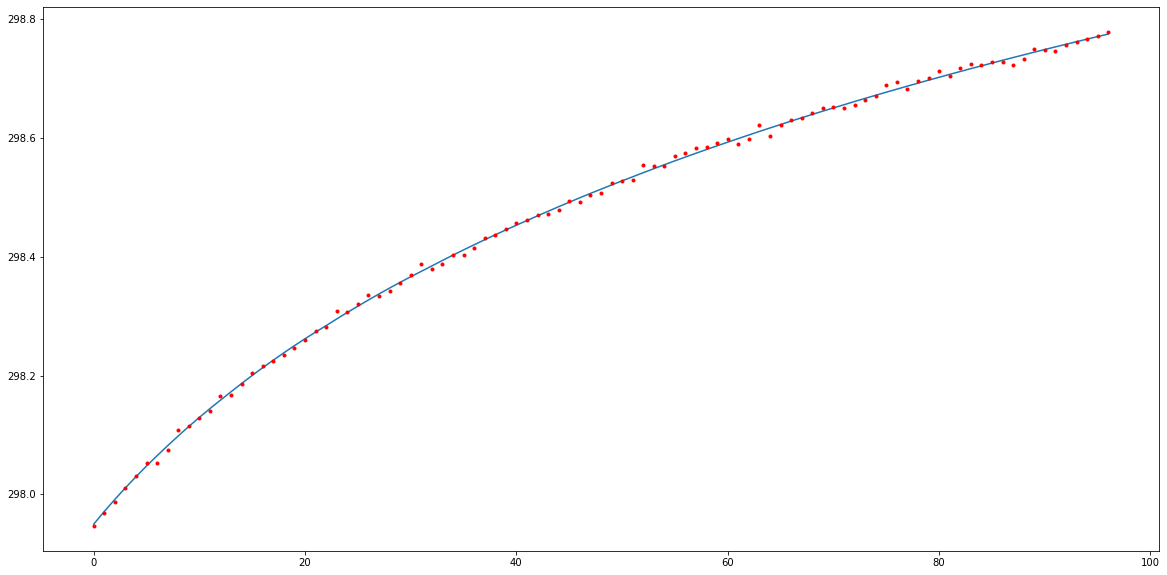

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(YExact25)
plt.plot(Y,'.r')

In [11]:
# Parametros fijos:
cp = 4184.1 
k = 0.6034 

# Parametros a estimar:
nwp = 998.20 + 998.20*0.1 # Valor exacto = 998.20
nmi_h2o = 13.72 + 13.72*0.1 # Valor exacto = 13.72

# Vector de entrada:
P = [cp, nwp, k, nmi_h2o]
P = np.array(P)

In [12]:
a = np.zeros((9, 4))
x_senb = np.empty_like(a)
x_senb[0] = P
x_senb[1] = [cp+cp*0.1, nwp, k, nmi_h2o] #Tcp(+)
x_senb[2] = [cp-cp*0.1, nwp, k, nmi_h2o] #Tcp(-)
x_senb[3] = [cp, nwp+nwp*0.1, k, nmi_h2o] #Tp(+)
x_senb[4] = [cp, nwp-nwp*0.1, k, nmi_h2o] #Tp(-)
x_senb[5] = [cp, nwp, k+k*0.1, nmi_h2o] #Tk(+)
x_senb[6] = [cp, nwp, k-k*0.1, nmi_h2o] #Tk(-)
x_senb[7] = [cp, nwp, k, nmi_h2o+nmi_h2o*0.1] #Tmi_h2o(+)
x_senb[8] = [cp, nwp, k, nmi_h2o-nmi_h2o*0.1] #Tmi_h2o(-)
x_senb

array([[4.184100e+03, 1.098020e+03, 6.034000e-01, 1.509200e+01],
       [4.602510e+03, 1.098020e+03, 6.034000e-01, 1.509200e+01],
       [3.765690e+03, 1.098020e+03, 6.034000e-01, 1.509200e+01],
       [4.184100e+03, 1.207822e+03, 6.034000e-01, 1.509200e+01],
       [4.184100e+03, 9.882180e+02, 6.034000e-01, 1.509200e+01],
       [4.184100e+03, 1.098020e+03, 6.637400e-01, 1.509200e+01],
       [4.184100e+03, 1.098020e+03, 5.430600e-01, 1.509200e+01],
       [4.184100e+03, 1.098020e+03, 6.034000e-01, 1.660120e+01],
       [4.184100e+03, 1.098020e+03, 6.034000e-01, 1.358280e+01]])

In [13]:
#test exact
start = time.time() # Iniciar medida del tiempo
y_predT = RL_model.predict(x_senb)
#score_test = model.score(x_test, y_test)
end = time.time() # Tomar el tiempo final
total = end - start
print('Tiempo total validación: ' + str(total) + ' segundos')
#print('Score test: %f' % score_test,"\n")

Tiempo total validación: 0.000997304916381836 segundos


In [14]:
Jcp = (y_predT[1] - y_predT[2]) / (2*0.1*cp)
Jp = (y_predT[3] - y_predT[4]) / (2*0.1*nwp)
Jk = (y_predT[5] - y_predT[6]) / (2*0.1*k)
Jmi_h2o = (y_predT[7] - y_predT[8]) / (2*0.1*nmi_h2o)

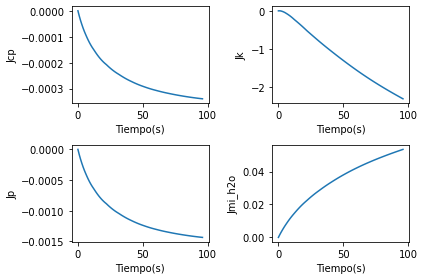

In [15]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(Jcp)
#axs[0, 0].set_title("Jcp")
axs[0, 0].set(xlabel='Tiempo(s)',ylabel='Jcp')
axs[1, 0].plot(Jp)
#axs[1, 0].set_title("Jp")
axs[1, 0].set(xlabel='Tiempo(s)',ylabel='Jp')
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(Jk)
axs[0, 1].set(xlabel='Tiempo(s)',ylabel='Jk')
#axs[0, 1].set_title("Jk")
axs[1, 1].plot(Jmi_h2o)
#axs[1, 1].set_title("Jmi_H2O")
axs[1, 1].set(xlabel='Tiempo(s)',ylabel='Jmi_h2o')
              

fig.tight_layout()

#fig.suptitle('Análisis de sensibilidad')

# for ax in axs.flat:
#     ax.set(xlabel='Tiempo(s)\n', ylabel='∆T(°C)\n')

plt.savefig('analisisenb_2daImagen.png',bbox_inches='tight')

In [16]:
from numpy.linalg import norm 
import pandas as pd

# Otras variables:
J = np.array((Jp, Jmi_h2o)).T
omega = np.diag(np.diag(J.T.dot(J))) # MATLAB ---> omega = diag(diag(J'*J)) // Matriz 2x2
mi = 0.001

#Para probar en MATLAB:
df = pd.DataFrame(J)
df.to_excel('J.xlsx')

print("Dimensiones:")
print(J.shape)
print(omega.shape,'\n')

print("Valores:")
print(omega)
print(nk)
print(nmi_h2o)
print(P)

Dimensiones:
(97, 2)
(2, 2) 

Valores:
[[1.27425485e-04 0.00000000e+00]
 [0.00000000e+00 1.32728203e-01]]


NameError: name 'nk' is not defined

In [ ]:
def Fun_S():
    import numpy as np
    # Y = evalin('base','Y');
    Taux = RL_model.predict(P.reshape(1,-1)) # Taux = modelo2(P); %comsol
    T= Taux.T # T = Taux[P,:].T
    s = (Y-T).T * (Y-T)
    return s, T

In [ ]:
s, Td = Fun_S()

In [ ]:
PP = P.dot(P) - (P.dot(P) + np.linalg.inv(J.T.dot(J) + mi*omega).dot(J.T).dot(Y-T))
PP.shape

In [ ]:
from numpy.linalg import norm 

Taux = RL_model.predict(P.reshape(1,-1))
J = np.array((Jp, Jmi_h2o)).T
omega = np.diag(np.diag(J.T.dot(J))) # MATLAB ---> omega = diag(diag(J'*J)) // Matriz 2x2
mi = 0.001
P_pro = P.dot(P) + (np.linalg.inv(J.T.dot(J) + mi*omega).dot(J.T)).dot(Y-T)

i=1
while (norm(P.dot(P)-(P_pro)) > 10e-5):
    Taux = RL_model.predict(P.reshape(1,-1))
    J = np.array((Jp, Jmi_h2o)).T
    omega = np.diag(np.diag(J.T.dot(J))) # MATLAB ---> omega = diag(diag(J'*J)) // Matriz 2x2
    
    if (Fun_S(T) < Fun_S(P_pro[0])):
        mi = 10*mi
        
    else:
        P = P.dot(P) + np.linalg.inv(J.T.dot(J) + mi*omega).dot(J.T).dot(Y-T)
        mi = 0.1*mi

    i = i + 1
res = P

In [ ]:
P_pro.shape

In [ ]:
T.shape

In [ ]:
Y.shape

In [ ]:
s.shape

In [ ]:
P_pro

In [ ]:
# P.dot(P) + (np.linalg.inv(J.T.dot(J) + mi*omega).dot(J.T)).dot(Y-T) #Check

In [ ]:
P.dot(P) + (np.linalg.inv(J.T.dot(J) + mi*omega).dot(J.T)).dot(Y-Td).shape

In [ ]:
Fun_S(Td)

In [ ]:
Fun_S(P_pro[1])

In [ ]:
Fun_S(T).shape

In [ ]:
res

In [20]:
Taux = RL_model.predict(P.reshape(1,-1))
P.dot(P) + np.linalg.inv(J.T.dot(J) + mi*omega).dot(J.T).dot(Y-Taux.T)

array([[18712462.37083685, 18712414.63856419, 18712375.72334475,
        18712326.0934623 , 18712284.46289728, 18712238.47899465,
        18712237.88169528, 18712191.36976695, 18712120.07823822,
        18712105.39710424, 18712078.51571649, 18712052.09119087,
        18712000.37662107, 18711995.84225661, 18711958.36578849,
        18711919.04825892, 18711892.97821149, 18711874.8044308 ,
        18711855.2979382 , 18711828.87129869, 18711801.67068098,
        18711769.10524509, 18711755.52949363, 18711697.88733888,
        18711702.03435545, 18711675.25442694, 18711640.92568164,
        18711644.71902123, 18711626.30803687, 18711599.8945408 ,
        18711571.79155333, 18711532.96347267, 18711548.24897775,
        18711533.34763676, 18711500.6647889 , 18711498.32591078,
        18711473.19760063, 18711440.51486125, 18711428.96046234,
        18711405.89841141, 18711384.80427589, 18711374.43593747,
        18711357.11551718, 18711354.45291831, 18711338.64767342,
        18711307.37262473

In [ ]:
13.72 + 13.72*0.1

In [21]:
YExact25

array([297.95  , 297.9713, 297.9916, 298.0111, 298.0298, 298.0479,
       298.0652, 298.0821, 298.0985, 298.1144, 298.1297, 298.1445,
       298.1588, 298.1729, 298.1868, 298.2003, 298.2134, 298.2261,
       298.2385, 298.2505, 298.2621, 298.2733, 298.2842, 298.2954,
       298.3063, 298.3169, 298.3273, 298.3375, 298.3474, 298.357 ,
       298.3664, 298.3755, 298.3846, 298.3938, 298.4028, 298.4116,
       298.4202, 298.4287, 298.437 , 298.4452, 298.4532, 298.461 ,
       298.4689, 298.4766, 298.4843, 298.4918, 298.4993, 298.5066,
       298.5137, 298.5208, 298.5278, 298.5346, 298.5415, 298.5482,
       298.5549, 298.5615, 298.5679, 298.5743, 298.5806, 298.5868,
       298.5929, 298.599 , 298.605 , 298.611 , 298.6168, 298.6226,
       298.6284, 298.634 , 298.6396, 298.6451, 298.6505, 298.6559,
       298.6613, 298.6666, 298.6718, 298.677 , 298.6821, 298.6872,
       298.6922, 298.6972, 298.7021, 298.707 , 298.7118, 298.7166,
       298.7213, 298.726 , 298.7307, 298.7353, 298.7398, 298.7

In [31]:
norm(P[3])

15.092

In [27]:
P

array([4.18410e+03, 1.09802e+03, 6.03400e-01, 1.50920e+01])

In [32]:
plt.plot(s)

NameError: name 's' is not defined

In [2]:
45.08 + 45.08*0.1

49.588